### 1.0 Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc, average_precision_score, classification_report, confusion_matrix

### 2.0 Load Data

In [14]:
df = pd.read_csv('./squatdata.csv')

df

,label,nose_x,nose_y,nose_z,nose_v,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_shoulder_v,right_shoulder_x,...,right_knee_z,right_knee_v,left_ankle_x,left_ankle_y,left_ankle_z,left_ankle_v,right_ankle_x,right_ankle_y,right_ankle_z,right_ankle_v
0,up,0.534843,0.147982,-0.268309,0.999982,0.579393,0.231487,-0.096035,0.999980,0.492536,...,-0.072671,0.985612,0.578099,0.759075,0.027200,0.972405,0.490069,0.744006,0.044383,0.978160
1,up,0.534616,0.146347,-0.199155,0.999993,0.574378,0.239949,-0.032144,0.999986,0.490907,...,-0.017558,0.990454,0.582109,0.757138,0.098183,0.980775,0.481687,0.766540,0.092971,0.987461
2,up,0.534515,0.146301,-0.191119,0.999994,0.574328,0.239890,-0.029094,0.999986,0.490821,...,-0.019129,0.990599,0.582669,0.757638,0.093466,0.980843,0.481825,0.768170,0.090635,0.987959
3,up,0.534432,0.146312,-0.182685,0.999995,0.574492,0.239809,-0.027983,0.999987,0.490665,...,-0.014492,0.990645,0.582858,0.757781,0.080272,0.981120,0.481921,0.767088,0.097178,0.988489
4,up,0.534422,0.146302,-0.170359,0.999996,0.574919,0.239827,-0.025521,0.999988,0.490680,...,-0.007411,0.990738,0.582845,0.757678,0.073182,0.981676,0.481950,0.761946,0.107647,0.988776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5008,up,0.407681,0.090363,-0.287707,0.999993,0.457613,0.180879,-0.118367,0.999982,0.368265,...,0.015476,0.990355,0.465322,0.739908,-0.043127,0.987645,0.403436,0.751272,0.135333,0.992430
5009,up,0.403316,0.086621,-0.279820,0.999994,0.453319,0.178047,-0.111507,0.999983,0.361666,...,-0.037429,0.987010,0.445196,0.740407,-0.025684,0.986913,0.403065,0.751742,0.043211,0.990292
5010,up,0.399570,0.081523,-0.348003,0.999994,0.450707,0.175864,-0.152738,0.999983,0.358344,...,-0.050147,0.960627,0.433110,0.738969,-0.073337,0.980069,0.404907,0.752917,0.034485,0.974134
5011,up,0.396185,0.075364,-0.335939,0.999993,0.449960,0.171554,-0.155685,0.999981,0.355112,...,-0.042933,0.866298,0.411662,0.742109,-0.206554,0.954389,0.406328,0.752424,0.020928,0.914790


In [15]:
df = df.dropna()
df = df.drop_duplicates()

# usamos labelencoder para transformar la columna label en 0 y 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["label"] = le.fit_transform(df["label"])

#### 2.1 EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013 entries, 0 to 5012
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   label             5013 non-null   int64  
 1   nose_x            5013 non-null   float64
 2   nose_y            5013 non-null   float64
 3   nose_z            5013 non-null   float64
 4   nose_v            5013 non-null   float64
 5   left_shoulder_x   5013 non-null   float64
 6   left_shoulder_y   5013 non-null   float64
 7   left_shoulder_z   5013 non-null   float64
 8   left_shoulder_v   5013 non-null   float64
 9   right_shoulder_x  5013 non-null   float64
 10  right_shoulder_y  5013 non-null   float64
 11  right_shoulder_z  5013 non-null   float64
 12  right_shoulder_v  5013 non-null   float64
 13  left_hip_x        5013 non-null   float64
 14  left_hip_y        5013 non-null   float64
 15  left_hip_z        5013 non-null   float64
 16  left_hip_v        5013 non-null   float64


In [17]:
df.describe()

,label,nose_x,nose_y,nose_z,nose_v,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_shoulder_v,right_shoulder_x,...,right_knee_z,right_knee_v,left_ankle_x,left_ankle_y,left_ankle_z,left_ankle_v,right_ankle_x,right_ankle_y,right_ankle_z,right_ankle_v
count,5013.000000,5013.000000,5013.000000,5013.000000,5013.000000,5013.000000,5013.000000,5013.000000,5013.000000,5013.000000,...,5013.000000,5013.000000,5013.000000,5013.000000,5013.000000,5013.000000,5013.000000,5013.000000,5013.000000,5013.000000
mean,0.489926,0.500705,0.244676,-0.226224,0.999731,0.546507,0.325837,-0.067145,0.998069,0.456267,...,-0.160321,0.971670,0.544428,0.758165,-0.018364,0.942125,0.458677,0.759136,0.000647,0.959641
std,0.499948,0.037473,0.120759,0.082177,0.000410,0.037491,0.111579,0.063412,0.003421,0.038141,...,0.157213,0.023282,0.042806,0.018352,0.124261,0.045003,0.039551,0.016457,0.133082,0.041347
min,0.000000,0.394879,0.011750,-0.536679,0.997248,0.448787,0.104354,-0.299121,0.971853,0.350392,...,-0.433551,0.761500,0.406711,0.721434,-0.364406,0.661546,0.393018,0.725618,-0.443836,0.787491
25%,0.000000,0.465481,0.130633,-0.275794,0.999592,0.510342,0.219292,-0.107181,0.997570,0.422330,...,-0.311500,0.960251,0.511029,0.751337,-0.142655,0.907801,0.421583,0.751547,-0.133250,0.947618
50%,0.000000,0.491340,0.275184,-0.230985,0.999931,0.543916,0.360863,-0.069464,0.999566,0.446648,...,-0.248616,0.977118,0.541349,0.757212,-0.035929,0.952603,0.454122,0.759043,-0.030731,0.971386
75%,1.000000,0.534069,0.351612,-0.158853,0.999990,0.580375,0.425750,-0.019566,0.999979,0.491631,...,-0.001444,0.990614,0.581033,0.761518,0.097479,0.982620,0.489164,0.762680,0.124237,0.990142
max,1.000000,0.603295,0.583004,0.019270,0.999999,0.658921,0.575880,0.174089,0.999996,0.581792,...,0.113256,0.997981,0.661186,0.861504,0.250503,0.997702,0.579819,0.854531,0.318563,0.998623


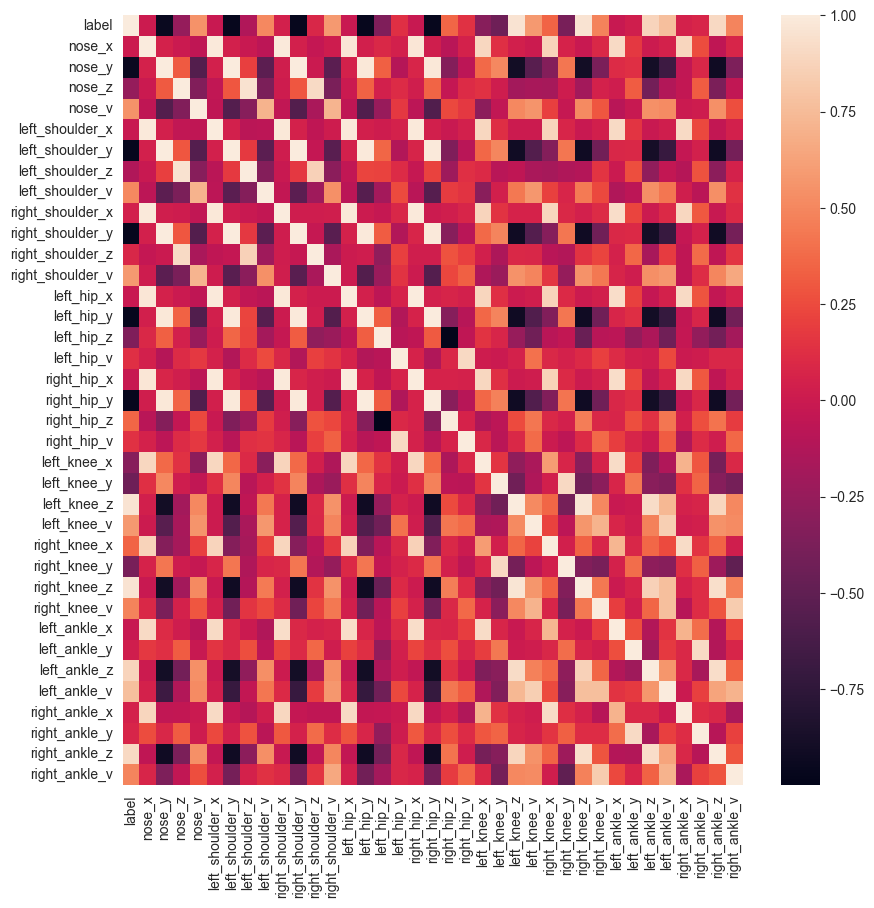

In [18]:
# plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr())
plt.show()


In [19]:
df["label"].value_counts()

label
0    2557
1    2456
Name: count, dtype: int64

<Axes: xlabel='label'>

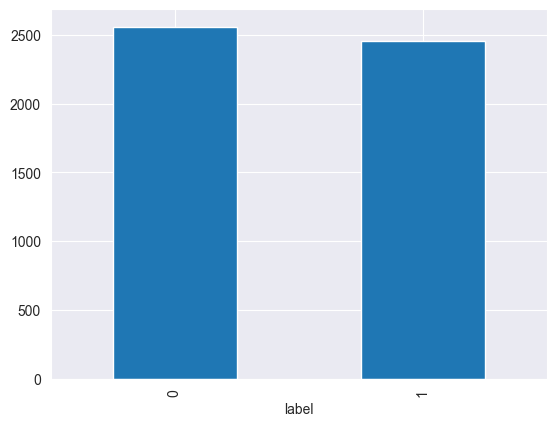

In [20]:
df["label"].value_counts().plot(kind='bar')

In [21]:
# plot scatter matrix
## sns.pairplot(df, hue='label')

### 3.0 Data Preprocessing

In [29]:
X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 4.0 Model Comparison

### 4.1 Logistic Regression

Accuracy: 0.99822695035461


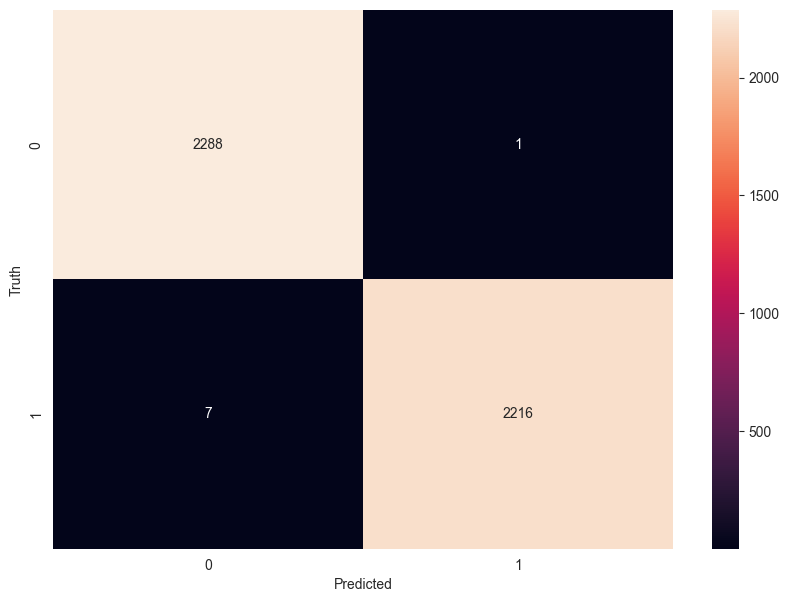

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

## Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [31]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2289
           1       1.00      1.00      1.00      2223

    accuracy                           1.00      4512
   macro avg       1.00      1.00      1.00      4512
weighted avg       1.00      1.00      1.00      4512



### 4.2 Random Forest

Accuracy: 0.9971187943262412


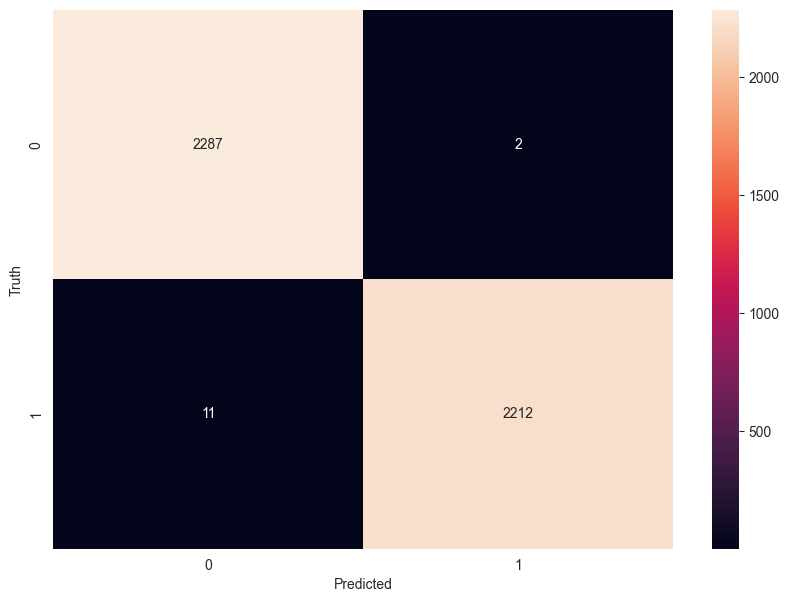

In [33]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

## Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### 4.3 Support Vector Machine

Accuracy: 0.99822695035461


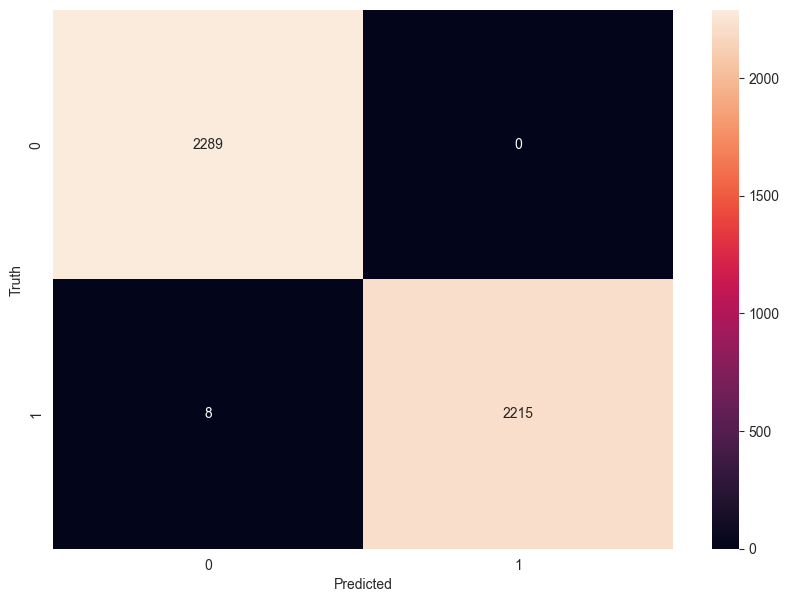

In [34]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

## Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### 4.4 Model Comparison

In [35]:
models = [LogisticRegression(), RandomForestClassifier(), SVC()]
model_names = ['Logistic Regression', 'Random Forest', 'SVM']

for model, model_name in zip(models, model_names):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{model_name} Accuracy: {scores.mean()}')

Logistic Regression Accuracy: 0.9946141615074936
Random Forest Accuracy: 0.9978057842440741
SVM Accuracy: 0.9950133631042999
